In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# akuisisi data, preproses, dan fitur

In [30]:
DATA_KNN_2000x2000 = pd.read_excel('excel/bahan_knn/DATA_KNN_2000x2000.xlsx',sheet_name='DATA_KNN')
DATA_KNN_1800x1800 = pd.read_excel('excel/bahan_knn/DATA_KNN_1800x1800.xlsx')
DATA_KNN_3000x1800 = pd.read_excel('excel/bahan_knn/DATA_KNN_3000x1800.xlsx')
rmssd_sdnn = pd.read_excel('excel/bahan_knn/rmssd_sdnn.xlsx')
DATA_KNN_2000x2000_NEW = pd.read_excel('excel/bahan_knn/DATA_KNN_2000x2000_NEW.xlsx')
minmax = MinMaxScaler()

X_DATA_KNN_2000x2000 = DATA_KNN_2000x2000[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
X_DATA_KNN_1800x1800 = DATA_KNN_1800x1800[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
X_DATA_KNN_3000x1800 = DATA_KNN_3000x1800[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
X_rmssd_sdnn = rmssd_sdnn[['BPM','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
X_DATA_KNN_2000x2000_NEW = DATA_KNN_2000x2000_NEW[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]

X_DATA_KNN_2000x2000 = minmax.fit_transform(X_DATA_KNN_2000x2000)
X_DATA_KNN_1800x1800 = minmax.fit_transform(X_DATA_KNN_1800x1800)
X_DATA_KNN_3000x1800 = minmax.fit_transform(X_DATA_KNN_3000x1800)
X_rmssd_sdnn = minmax.fit_transform(X_rmssd_sdnn)
X_DATA_KNN_2000x2000_NEW = minmax.fit_transform(X_DATA_KNN_2000x2000_NEW)

Y_DATA_KNN_2000x2000 = DATA_KNN_2000x2000['KECEMASAN']
Y_DATA_KNN_1800x1800 = DATA_KNN_1800x1800['KECEMASAN']
Y_DATA_KNN_3000x1800 = DATA_KNN_3000x1800['KECEMASAN']
Y_rmssd_sdnn = rmssd_sdnn['KECEMASAN']
Y_DATA_KNN_2000x2000_NEW = DATA_KNN_2000x2000_NEW['KECEMASAN']


# # x = data[['BPM','HRV']]
# datas[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']] = minmax.fit_transform(datas[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']])
# # datas[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']] = minmax.fit_transform(datas[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']])
# # x = datas[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
# x = datas[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
# y = datas['KECEMASAN']
# y_regresi = datas['KECEMASAN_REGRESI']
# # datas

## basic

NameError: name 'datas' is not defined

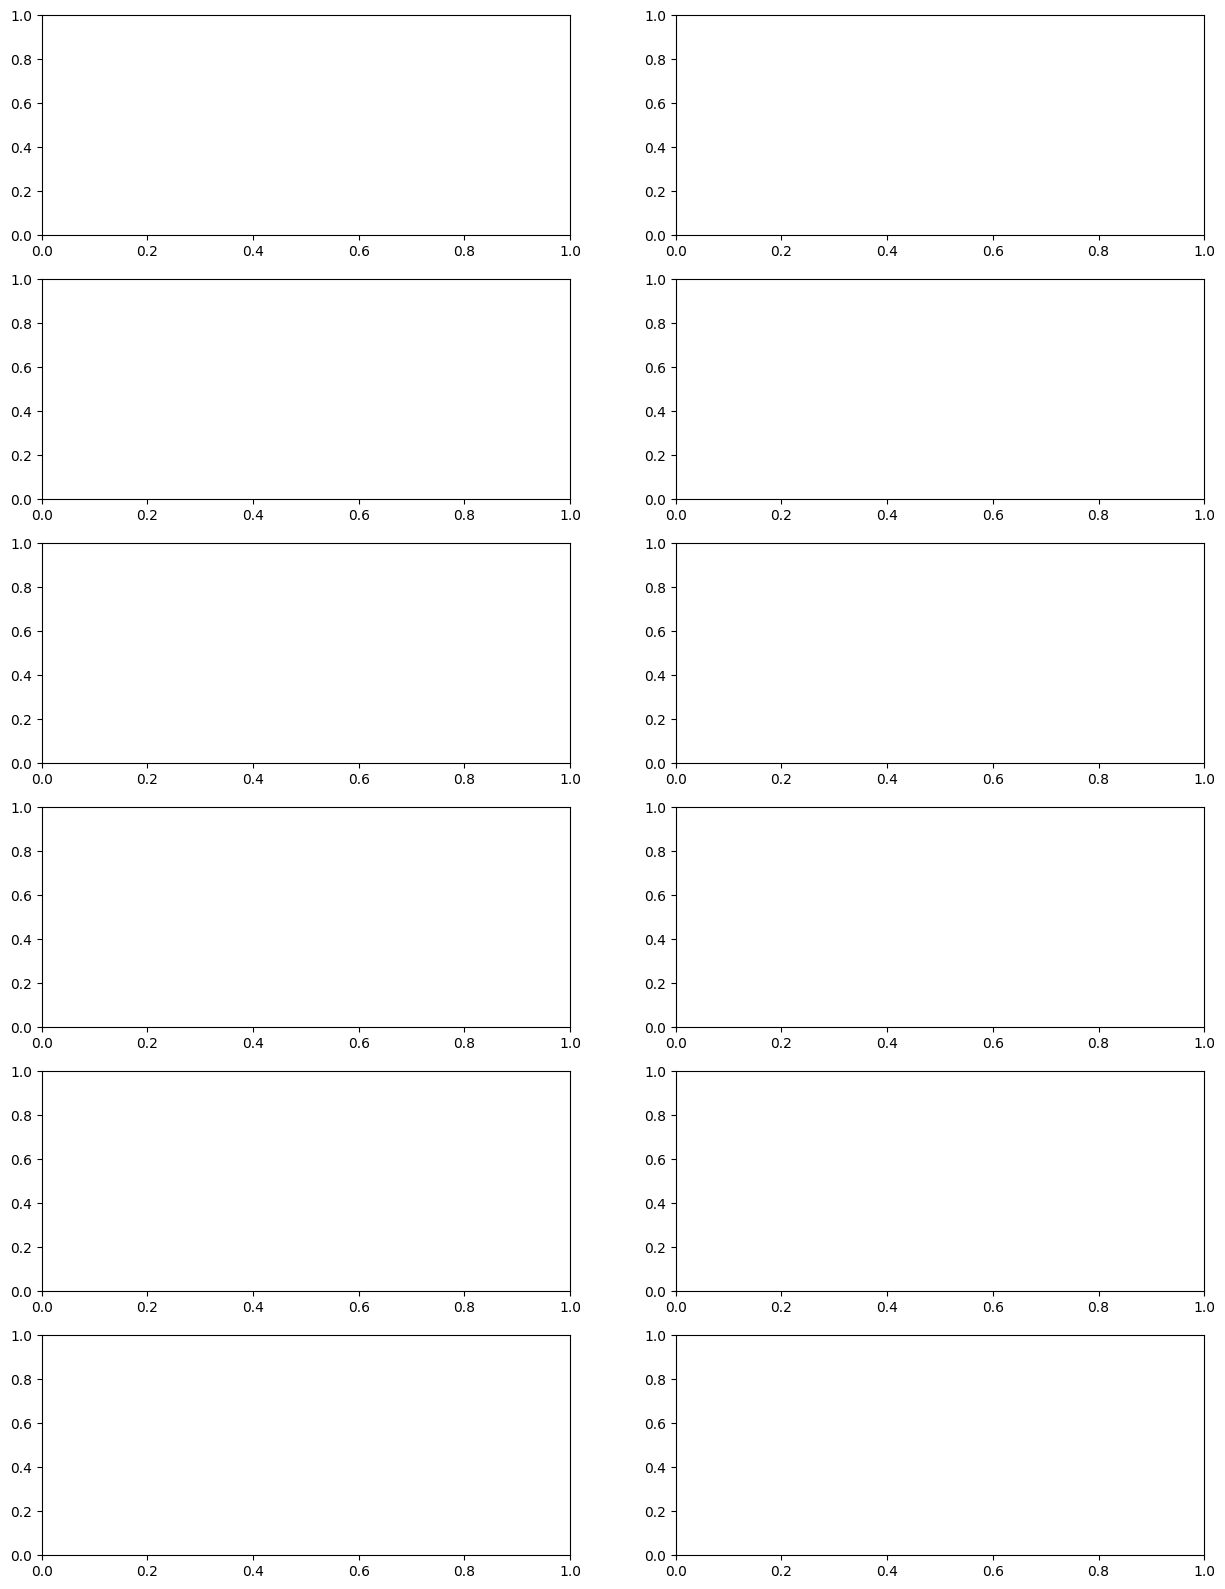

In [3]:
fig, axes = plt.subplots(6,2,figsize = (15,20))

sns.histplot(data = datas, x = 'KECEMASAN', ax = axes[0,0])
sns.histplot(data = datas, x = 'BPM', ax = axes[1,0])
sns.histplot(data = datas, x = 'HRV', ax = axes[2,0])
sns.histplot(data = datas, x = 'RMSSD', ax = axes[3,0])
sns.histplot(data = datas, x = 'SDNN', ax = axes[4,0])
sns.histplot(data = datas, x = 'VAR', ax = axes[5,0])
sns.histplot(data = datas, x = 'STD', ax = axes[0,1])
sns.histplot(data = datas, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = datas, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = datas, x = 'DISTANCE', ax = axes[3,1])
# sns.histplot(data = datas, x = 'KECEMASAN_REGRESI', ax = axes[4,1])


## smote

### Klasifikasi

In [31]:
sm = SMOTE(random_state=30)
X_DATA_KNN_2000x2000_smote,Y_DATA_KNN_2000x2000_smote = sm.fit_resample(X_DATA_KNN_2000x2000,Y_DATA_KNN_2000x2000)
X_DATA_KNN_1800x1800_smote,Y_DATA_KNN_1800x1800_smote = sm.fit_resample(X_DATA_KNN_1800x1800,Y_DATA_KNN_1800x1800)
X_DATA_KNN_3000x1800_smote,Y_DATA_KNN_3000x1800_smote = sm.fit_resample(X_DATA_KNN_3000x1800,Y_DATA_KNN_3000x1800)
X_rmssd_sdnn_smote,Y_rmssd_sdnn_smote = sm.fit_resample(X_rmssd_sdnn,Y_rmssd_sdnn)
X_DATA_KNN_2000x2000_NEW_smote,Y_DATA_KNN_2000x2000_NEW_smote = sm.fit_resample(X_DATA_KNN_2000x2000_NEW,Y_DATA_KNN_2000x2000_NEW)

## PLOT

<Axes: xlabel='DISTANCE', ylabel='Count'>

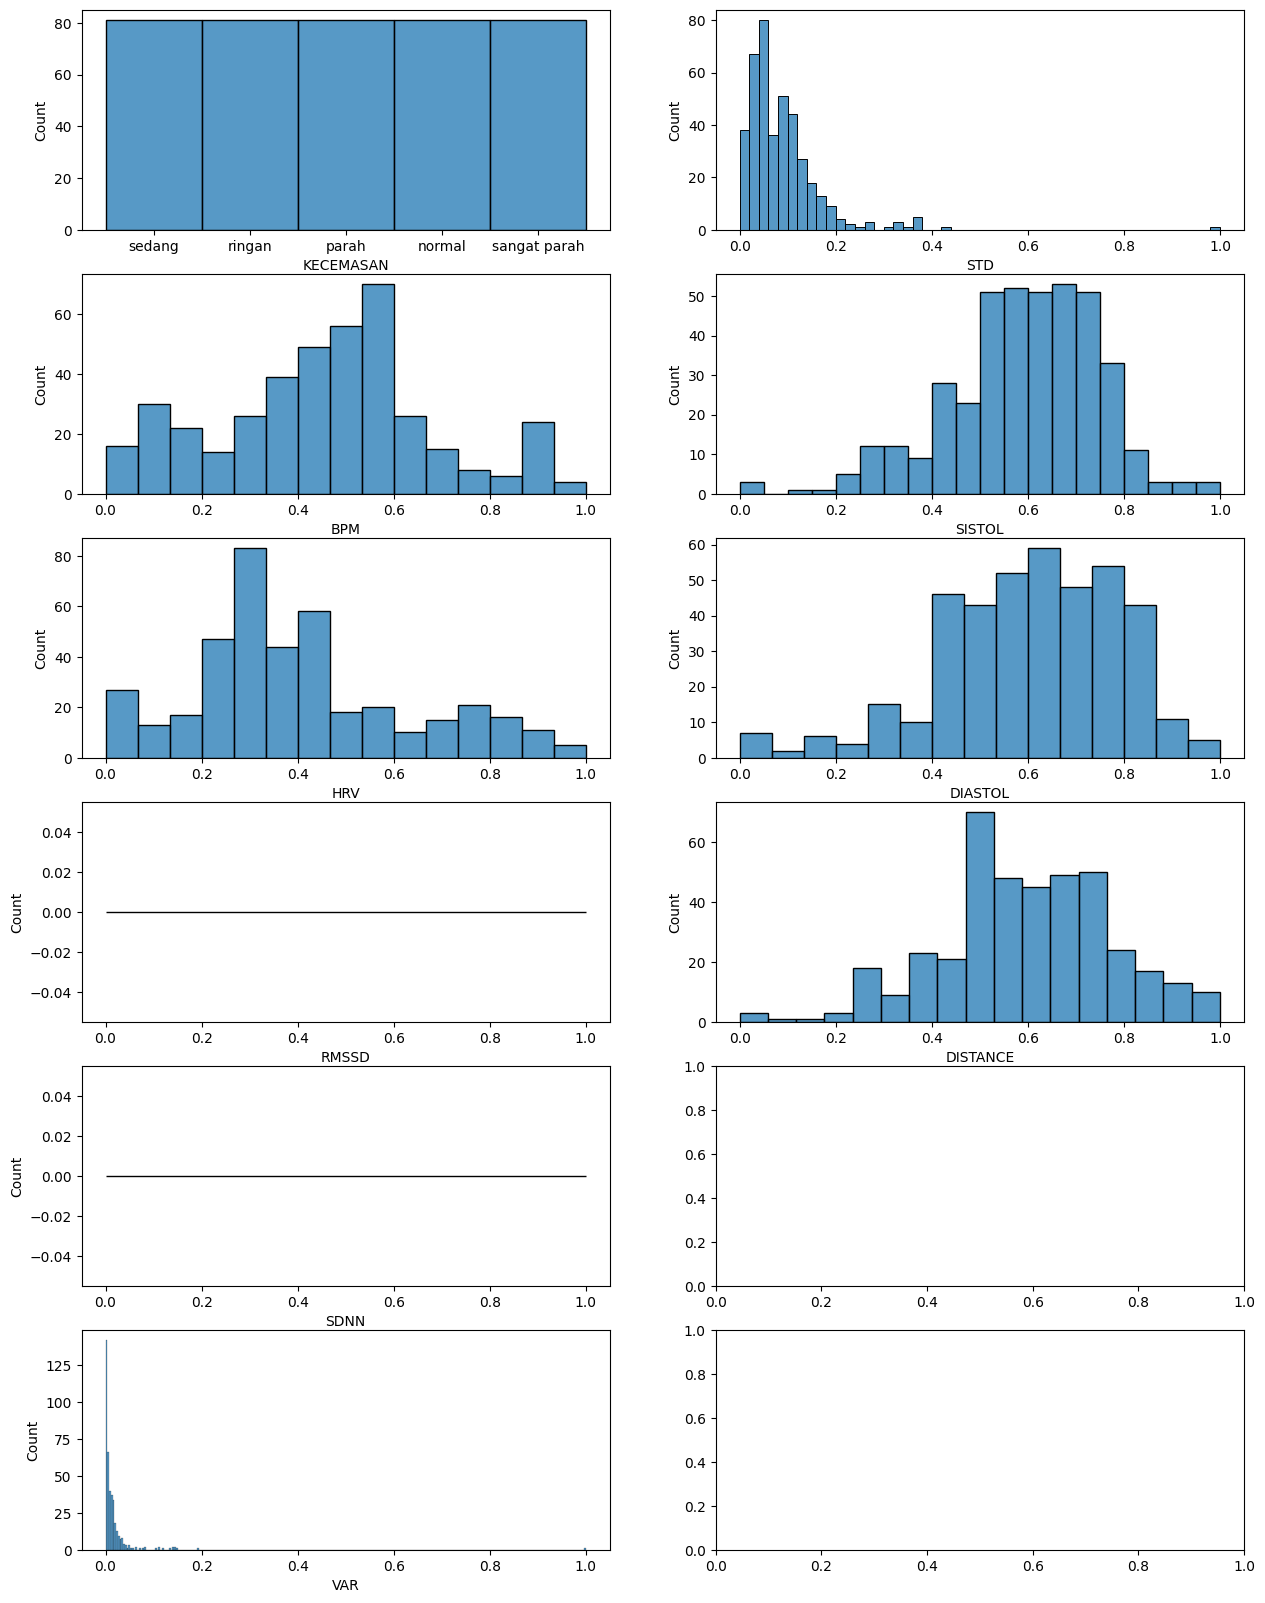

In [ ]:
dfx_smote = pd.DataFrame(x_smote,columns=['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE'])
# dfx_smote = pd.DataFrame(x_smote,columns=['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE'])
dfy_smote = pd.DataFrame(y_smote)
data_knn_smote = pd.concat([dfx_smote,dfy_smote],axis = 1)

fig, axes = plt.subplots(6,2,figsize = (15,20))


sns.histplot(data = data_knn_smote, x = 'KECEMASAN', ax = axes[0,0])
sns.histplot(data = data_knn_smote, x = 'BPM', ax = axes[1,0])
sns.histplot(data = data_knn_smote, x = 'HRV', ax = axes[2,0])
sns.histplot(data = data_knn_smote, x = 'RMSSD', ax = axes[3,0])
sns.histplot(data = data_knn_smote, x = 'SDNN', ax = axes[4,0])
sns.histplot(data = data_knn_smote, x = 'VAR', ax = axes[5,0])
sns.histplot(data = data_knn_smote, x = 'STD', ax = axes[0,1])
sns.histplot(data = data_knn_smote, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = data_knn_smote, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = data_knn_smote, x = 'DISTANCE', ax = axes[3,1])
# sns.histplot(data = data_knn_smote, x = 'KECEMASAN_REGRESI', ax = axes[4,1])

### Regresi

In [ ]:
sm = SMOTE(random_state=30)
x_smote,y_smote_regresi = sm.fit_resample(x,y_regresi)

<Axes: xlabel='DISTANCE', ylabel='Count'>

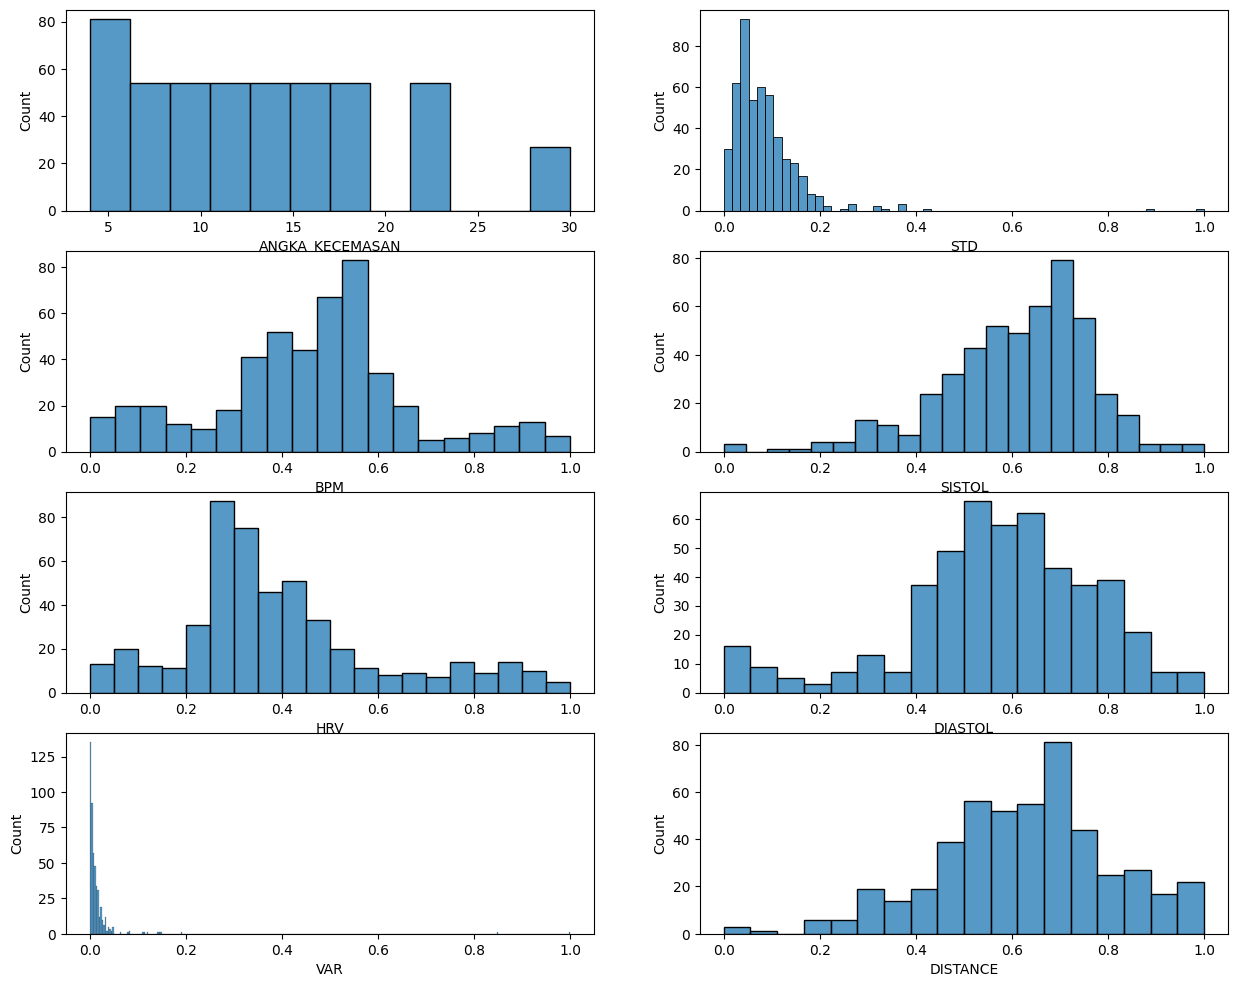

In [ ]:
dfx_smote = pd.DataFrame(x_smote,columns=['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE'])
dfy_smote_regresi = pd.DataFrame(y_smote_regresi)
data_knn_smote = pd.concat([dfx_smote,dfy_smote_regresi],axis = 1)

fig, axes = plt.subplots(4,2,figsize = (15,12))

sns.histplot(data = data_knn_smote, x = 'ANGKA_KECEMASAN', ax = axes[0,0])
sns.histplot(data = data_knn_smote, x = 'BPM', ax = axes[1,0])
sns.histplot(data = data_knn_smote, x = 'HRV', ax = axes[2,0])
sns.histplot(data = data_knn_smote, x = 'VAR', ax = axes[3,0])
sns.histplot(data = data_knn_smote, x = 'STD', ax = axes[0,1])
sns.histplot(data = data_knn_smote, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = data_knn_smote, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = data_knn_smote, x = 'DISTANCE', ax = axes[3,1])

In [ ]:
print(x.shape,x_smote.shape)

(297, 7) (405, 7)


# KNN

### klasifikasi normal

In [32]:
X_DATA_KNN_2000x2000_smote_train, X_DATA_KNN_2000x2000_smote_test, Y_DATA_KNN_2000x2000_smote_train, Y_DATA_KNN_2000x2000_smote_test = train_test_split(X_DATA_KNN_2000x2000_smote, Y_DATA_KNN_2000x2000_smote, test_size= 0.2, random_state=20)
X_DATA_KNN_1800x1800_smote_train, X_DATA_KNN_1800x1800_smote_test, Y_DATA_KNN_1800x1800_smote_train, Y_DATA_KNN_1800x1800_smote_test = train_test_split(X_DATA_KNN_1800x1800_smote, Y_DATA_KNN_1800x1800_smote, test_size= 0.2, random_state=20)
X_DATA_KNN_3000x1800_smote_train, X_DATA_KNN_3000x1800_smote_test, Y_DATA_KNN_3000x1800_smote_train, Y_DATA_KNN_3000x1800_smote_test = train_test_split(X_DATA_KNN_3000x1800_smote, Y_DATA_KNN_3000x1800_smote, test_size= 0.2, random_state=20)
X_rmssd_sdnn_smote_train, X_rmssd_sdnn_smote_test, Y_rmssd_sdnn_smote_train, Y_rmssd_sdnn_smote_test = train_test_split(X_rmssd_sdnn_smote, Y_rmssd_sdnn_smote, test_size= 0.2, random_state=20)
X_DATA_KNN_2000x2000_NEW_smote_train, X_DATA_KNN_2000x2000_NEW_smote_test, Y_DATA_KNN_2000x2000_NEW_smote_train, Y_DATA_KNN_2000x2000_NEW_smote_test = train_test_split(X_DATA_KNN_2000x2000_NEW_smote, Y_DATA_KNN_2000x2000_NEW_smote, test_size= 0.2, random_state=20)


DATA_KNN_2000x2000_smote__acc = []
DATA_KNN_1800x1800_smote__acc = []
DATA_KNN_3000x1800_smote__acc = []
rmssd_sdnn_smote__acc = []
DATA_KNN_2000x2000_NEW_smote__acc = []

for i in range(1,51):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_DATA_KNN_2000x2000_smote_train,Y_DATA_KNN_2000x2000_smote_train)
    model.fit(X_DATA_KNN_1800x1800_smote_train,Y_DATA_KNN_1800x1800_smote_train)
    model.fit(X_DATA_KNN_3000x1800_smote_train,Y_DATA_KNN_3000x1800_smote_train)
    model.fit(X_rmssd_sdnn_smote_train,Y_rmssd_sdnn_smote_train)
    model.fit(X_DATA_KNN_2000x2000_NEW_smote_train,Y_DATA_KNN_2000x2000_NEW_smote_train)


    DATA_KNN_2000x2000_smote__accuracy = model.score(X_DATA_KNN_2000x2000_smote_test, Y_DATA_KNN_2000x2000_smote_test)
    DATA_KNN_1800x1800_smote__accuracy = model.score(X_DATA_KNN_1800x1800_smote_test, Y_DATA_KNN_1800x1800_smote_test)
    DATA_KNN_3000x1800_smote__accuracy = model.score(X_DATA_KNN_3000x1800_smote_test, Y_DATA_KNN_3000x1800_smote_test)
    rmssd_sdnn_smote__accuracy = model.score(X_rmssd_sdnn_smote_test, Y_rmssd_sdnn_smote_test)
    DATA_KNN_2000x2000_NEW_smote__accuracy = model.score(X_DATA_KNN_2000x2000_NEW_smote_test, Y_DATA_KNN_2000x2000_smote_test)


    # print("Accuracy:", accuracy)
    # akur.append(accuracy)
    DATA_KNN_2000x2000_smote__acc.append(DATA_KNN_2000x2000_smote__accuracy)
    DATA_KNN_1800x1800_smote__acc.append(DATA_KNN_1800x1800_smote__accuracy)
    DATA_KNN_3000x1800_smote__acc.append(DATA_KNN_3000x1800_smote__accuracy)
    rmssd_sdnn_smote__acc.append(rmssd_sdnn_smote__accuracy)
    DATA_KNN_2000x2000_NEW_smote__acc.append(DATA_KNN_2000x2000_NEW_smote__accuracy)



# nilai_akurasi = (pd.DataFrame(akur))
DATA_KNN_2000x2000_smote__acc = (pd.DataFrame(DATA_KNN_2000x2000_smote__acc))
DATA_KNN_1800x1800_smote__acc = (pd.DataFrame(DATA_KNN_1800x1800_smote__acc))
DATA_KNN_3000x1800_smote__acc = (pd.DataFrame(DATA_KNN_3000x1800_smote__acc))
rmssd_sdnn_smote__acc = (pd.DataFrame(rmssd_sdnn_smote__acc))
DATA_KNN_2000x2000_NEW_smote__acc = (pd.DataFrame(DATA_KNN_2000x2000_NEW_smote__acc))

# nilai_akurasi[0].nlargest(5)
print(
DATA_KNN_2000x2000_smote__acc[0].nlargest(5),'\n',
DATA_KNN_1800x1800_smote__acc[0].nlargest(5),'\n',
DATA_KNN_3000x1800_smote__acc[0].nlargest(5),'\n',
rmssd_sdnn_smote__acc[0].nlargest(5),'\n',
DATA_KNN_2000x2000_NEW_smote__acc[0].nlargest(5),'\n',
)


0    0.740741
3    0.679012
2    0.654321
5    0.641975
1    0.629630
Name: 0, dtype: float64 
 0    0.866667
1    0.811111
2    0.766667
4    0.766667
3    0.744444
Name: 0, dtype: float64 
 0    0.766667
3    0.766667
6    0.766667
4    0.755556
1    0.744444
Name: 0, dtype: float64 
 17    0.506173
4     0.493827
7     0.493827
12    0.493827
13    0.493827
Name: 0, dtype: float64 
 0    0.777778
3    0.728395
2    0.703704
1    0.679012
4    0.679012
Name: 0, dtype: float64 



### klasifikasi smote

In [ ]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size= 0.2, random_state= 5)

akur = []
for i in range(1,51):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_smote,y_train_smote)

    accuracy = model.score(x_test_smote, y_test_smote)
    # print("Accuracy:", accuracy)
    akur.append(accuracy)
nilai_akurasi = (pd.DataFrame(akur))
nilai_akurasi[0].nlargest(5)


0    0.777778
2    0.765432
1    0.740741
6    0.728395
8    0.728395
Name: 0, dtype: float64

In [ ]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train_smote,y_train_smote)

accuracy = model.score(x_test_smote, y_test_smote)
# print("Accuracy:", accuracy)

y_pred_smote = model.predict(x_test_smote)


In [ ]:
matrixknn = classification_report(y_test_smote, y_pred_smote)
print(matrixknn)

              precision    recall  f1-score   support

      normal       0.75      0.71      0.73        17
       parah       0.42      0.50      0.45        10
      ringan       0.92      0.85      0.88        26
sangat parah       0.82      1.00      0.90        14
      sedang       0.75      0.64      0.69        14

    accuracy                           0.77        81
   macro avg       0.73      0.74      0.73        81
weighted avg       0.78      0.77      0.77        81



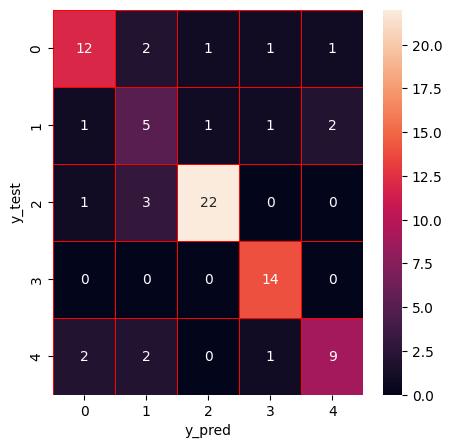

In [ ]:
f, ax =plt.subplots(figsize = (5,5))

cm= confusion_matrix(y_test_smote, y_pred_smote)
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()


### regresi_smote

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote_regresi, test_size= 0.2, random_state= 5)

akur = []
r2 = []
mse = []
mae = []

for i in range(1,51):
    k = i
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_smote,y_train_smote)

    y_pred_amote_regresi = model.predict(x_test_smote)
    r2.append(r2_score(y_test_smote,y_pred_amote_regresi))
    mse.append(mean_squared_error(y_test_smote,y_pred_amote_regresi))
    mae.append(mean_absolute_error(y_test_smote,y_pred_amote_regresi))

    # accuracy = model.score(x_test_smote, y_test_smote)
    # print("Accuracy:", accuracy)
    # akur.append(accuracy)
nilai_r2 = (pd.DataFrame(r2))
nilai_mse = (pd.DataFrame(mse))
nilai_mae = (pd.DataFrame(mae))
print(
nilai_r2[0].nlargest(5),
nilai_mse[0].nsmallest(5),
nilai_mae[0].nsmallest(5)
)

4     0.651763
11    0.646735
7     0.640855
9     0.639185
8     0.637828
Name: 0, dtype: float64 4     16.806939
11    17.049603
7     17.333386
9     17.413980
8     17.479466
Name: 0, dtype: float64 0    1.908163
1    1.994898
2    2.404762
3    2.543367
4    2.642857
Name: 0, dtype: float64


## BURAM

In [ ]:
# acc = []
# for i in range(1,51):
#     k = i
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train,y_train)

#     accuracy = model.score(x_test, y_test)
#     # print("Accuracy:", accuracy)
#     acc.append(accuracy)

# pd.DataFrame(acc).max()

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {'n_neighbors' : np.arange(1,51)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5,scoring = 'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 1}

alasan window size
alasan akurasi
pola per window size